In [ ]:
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [ ]:
%pip install --upgrade flatbuffers

In [11]:
!set -gx PATH /usr/local/cuda-11.7/bin $PATH
!set -gx LD_LIBRARY_PATH /usr/local/cuda-11.7/lib64 $LD_LIBRARY_PATH

In [1]:
!echo $LD_LIBRARY_PATH

/usr/local/cuda-11.7/lib64


In [11]:
#%pip install retina-face
%pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [171]:
%pip install pytorch-lightning
  

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.1/708.1 KB 594.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 KB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 KB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 KB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd 
import numpy as np
import cv2
import torch
import os
import glob
import re
import tensorflow as tf
from retinaface import RetinaFace
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms

import torchmetrics
import pytorch_lightning as pl
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
set_of_video = ['IS1000a','IS1001a','IS1001b','IS1001c','IS1003b','IS1003d','IS1006b','IS1008a',
                'IS1008b','IS1008c','IS1008d']

In [9]:
%pip install natsort

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from natsort import natsorted

In [28]:
lst = sorted([f'{0:024b}',f'{1:024b}',f'{2:024b}',f'{3:024b}',f'{4:024b}'])
print(lst)

['000000000000000000000000', '000000000000000000000001', '000000000000000000000010', '000000000000000000000011', '000000000000000000000100']


In [27]:
f'{3:024b}'

'000000000000000000000011'

In [ ]:
list_of_files = glob.glob("Face_Dominant_32x32/MostDominant/IS1000a/person2/*")
list_of_files

In [ ]:
list_of_files = natsorted(glob.glob("Face_Dominant_32x32/MostDominant/IS1000a/person2/*"))
list_of_files

In [36]:
for name_video_folder in set_of_video:
  for dom_name in ['MostDominant','NonDominant']:
    for number_person in range(1,5):
        list_of_files = natsorted(glob.glob(f"Face_Dominant_32x32/{dom_name}/{name_video_folder}/person{number_person}/*"))
        for count,file_idx in enumerate(list_of_files):
            count_hex = f'{count:016b}'
            os.rename(file_idx,f'Face_Dominant_32x32/{dom_name}/{name_video_folder}/person{number_person}/{count_hex}.jpg')

In [3]:

annot_data = pd.read_csv('dome_annotations_M1.csv')
dome_dataset = pd.read_csv('dome_dataset_M1.csv')
dome_dataset
annot_data = annot_data.join(dome_dataset['FMD'])
annot_data = annot_data.join(dome_dataset['FLD'])
annot_data = annot_data.drop(annot_data[annot_data.FMD == 0].index)
annot_data


,name,start (sec),end (sec),A11,A12,A13,A14,A21,A22,A23,A24,A31,A32,A33,A34,FMD,FLD
0,IS1000a,0,300,4,1,3,2,4,1,3,2,4,1,3,2,1,1
1,IS1000a,300,600,3,1,4,2,3,1,4,2,3,1,4,2,1,1
2,IS1000a,600,900,1,4,2,3,1,2,4,3,1,4,3,2,1,0
4,IS1000a,1200,1500,4,1,3,2,3,1,4,2,3,1,4,2,1,0
6,IS1001a,300,600,1,2,4,3,1,2,4,3,1,2,4,3,1,1
7,IS1001a,600,900,1,2,3,4,1,2,3,4,1,2,3,4,1,1
9,IS1001b,300,600,1,3,4,2,1,2,4,3,1,2,4,3,1,1
12,IS1001b,1200,1500,1,2,3,4,1,3,2,4,1,2,3,4,1,1
13,IS1001b,1500,1800,1,3,2,4,1,2,3,4,1,2,3,4,1,1
14,IS1001b,1800,2100,1,2,3,4,1,2,3,4,1,2,3,4,1,1


In [4]:
set_of_video = sorted(list(set(annot_data['name'].values)))
set_of_video


['IS1000a',
 'IS1001a',
 'IS1001b',
 'IS1001c',
 'IS1003b',
 'IS1003d',
 'IS1006b',
 'IS1008a',
 'IS1008b',
 'IS1008c',
 'IS1008d']

In [3]:
name_of_features = ['AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r',
                    'AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r',
                    'AU45_r','AU01_c','AU02_c','AU04_c','AU05_c','AU06_c','AU07_c',
                    'AU09_c','AU10_c','AU12_c','AU14_c','AU15_c','AU17_c','AU20_c','AU23_c',
                    'AU25_c','AU26_c','AU28_c','AU45_c']

In [ ]:
mostdom_data = pd.read_csv('OpenFaceFeatures/MostDominant/IS1000a/person3.csv')
mostdom_data = mostdom_data.drop(mostdom_data[mostdom_data.confidence < 0.80].index)
mostdom_data = mostdom_data.reset_index(drop=True)
mostdom_data

In [90]:
data1 = pd.read_csv('OpenFaceFeatures/MostDominant/IS1000a/person2.csv')
data1 = data1.drop(data1[data1.confidence < 0.80].index)
data1 = data1.reset_index(drop=True)
data1 = data1[name_of_features]
data2 = pd.read_csv('OpenFaceFeatures/MostDominant/IS1000a/person1.csv')
data2 = data2.drop(data2[data2.confidence < 0.80].index)
data2 = data2.reset_index(drop=True)
data2 = data2[name_of_features]
result = pd.concat([data1,data2])
result = result.reset_index(drop=True)
column_names = ["a", "b", "c"]

df = pd.DataFrame(columns = column_names)
data2
data2['predictor'] = '1'
data2.insert(loc=0, column='person', value='person1')
data2
data2['features'] = data2[name_of_features].values.tolist()
type(data2['features'][0][0])


float

In [5]:
column_names = ["features", "person", "type","predictors"]

result_csv = pd.DataFrame(columns = column_names)

for dom_name in ['MostDominant','NonDominant']:  
  for name_video_folder in set_of_video:
    list_of_files = glob.glob(f"OpenFaceFeatures/{dom_name}/{name_video_folder}/*.csv")
    for i in tqdm(list_of_files):
      temp_csv = pd.read_csv(i)
      temp_csv = temp_csv.drop(temp_csv[temp_csv.confidence < 0.80].index)
      temp_csv = temp_csv.reset_index(drop=True)
      #temp_csv = temp_csv[name_of_features]
      person_num = re.findall(r'person.',i)[0]
      temp_csv['features'] = temp_csv[name_of_features].values.tolist()
      temp_csv['person'] = person_num
      temp_csv['type'] = name_video_folder
      temp_csv['predictors'] = 1 if dom_name == 'MostDominant' else 0
      temp_csv = temp_csv[["features", "person", "type","predictors"]]
      result_csv = pd.concat([result_csv,temp_csv])

result_csv = result_csv.reset_index(drop=True)
result_csv

100%|██████████| 4/4 [00:00<00:00,  4.82it/s]


,features,person,type,predictors
0,"[0.92, 0.0, 0.35, 0.66, 0.44, 0.77, 0.0, 0.14,...",person1,IS1000a,1
1,"[1.24, 0.0, 0.41, 0.92, 0.7, 1.27, 0.03, 0.32,...",person1,IS1000a,1
2,"[1.21, 0.0, 0.4, 0.85, 0.65, 1.15, 0.03, 0.35,...",person1,IS1000a,1
3,"[0.89, 0.0, 0.45, 0.67, 0.64, 0.69, 0.16, 0.46...",person1,IS1000a,1
4,"[0.56, 0.0, 0.39, 0.42, 0.38, 0.19, 0.12, 0.28...",person1,IS1000a,1
...,...,...,...,...
161232,"[0.0, 0.07, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.2...",person4,IS1008d,0
161233,"[0.0, 0.07, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.4...",person4,IS1008d,0
161234,"[0.0, 0.08, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.5...",person4,IS1008d,0
161235,"[0.0, 0.08, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.3...",person4,IS1008d,0


In [94]:
result_csv.to_csv("Face_Features_DOM2",index=False)

In [100]:
features_csv = pd.read_csv('Face_Features_DOM2',parse_dates=list(features))
type(features_csv['features'][0])

NameError: name 'features' is not defined

In [6]:
person1_csv = result_csv.drop(result_csv[result_csv.person != 'person1'].index)
person2_csv = result_csv.drop(result_csv[result_csv.person != 'person2'].index)
person3_csv = result_csv.drop(result_csv[result_csv.person != 'person3'].index)
person4_csv = result_csv.drop(result_csv[result_csv.person != 'person4'].index)
person4_csv

,features,person,type,predictors
24405,"[0.39, 0.0, 0.0, 0.39, 0.0, 0.0, 0.0, 0.0, 0.0...",person4,IS1006b,1
24406,"[0.39, 0.0, 0.0, 0.39, 0.0, 0.0, 0.0, 0.0, 0.0...",person4,IS1006b,1
24407,"[0.1, 0.0, 0.29, 0.68, 0.32, 0.52, 0.0, 0.28, ...",person4,IS1006b,1
24408,"[1.3, 0.62, 0.0, 0.48, 0.35, 0.0, 0.0, 0.29, 0...",person4,IS1006b,1
24409,"[0.98, 0.77, 0.0, 0.6, 0.08, 0.0, 0.0, 0.38, 0...",person4,IS1006b,1
...,...,...,...,...
161232,"[0.0, 0.07, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.2...",person4,IS1008d,0
161233,"[0.0, 0.07, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.4...",person4,IS1008d,0
161234,"[0.0, 0.08, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.5...",person4,IS1008d,0
161235,"[0.0, 0.08, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.3...",person4,IS1008d,0


In [12]:
def data_NN(pd_person,type_mode="train"):
    features = pd_person['features'].values.tolist()
    labels = pd_person['predictors'].values.tolist()
    if type_mode == 'train':
        features = features[:int(len(features)*0.8)]
        labels = labels[:int(len(labels)*0.8)]
    if type_mode == 'val':
        features = features[int(len(features)*0.8):int(len(features)*0.9)]
        labels = labels[int(len(labels)*0.8):int(len(labels)*0.9)]
    if type_mode == 'test':
        features = features[int(len(features)*0.9):]
        labels = labels[int(len(labels)*0.9):]
    arr_features = []
    X = []
    y = []
    count = 1
    for feature in features:
        if count % 300 == 0:
            X.append(arr_features)
            if len(set(labels[count-2:count+2])) == 1:
                y.append(labels[count])
            arr_features = []
        else:
            arr_features.append(feature)
        count += 1
    X = np.array(X)
    X_mean = X.mean(1)
    X_std = X.std(1)
    X = np.concatenate([X_mean, X_std],axis=1)
    return X, y
    
X_train_person1,y_train_person1 = data_NN(person1_csv,'train')
X_train_person2,y_train_person2 = data_NN(person2_csv,'train')
X_train_person3,y_train_person3 = data_NN(person3_csv,'train')
X_train_person4,y_train_person4 = data_NN(person4_csv,'train')
assert np.shape(X_train_person1)[0] == np.shape(y_train_person1)[0]
assert np.shape(X_train_person2)[0] == np.shape(y_train_person2)[0]
assert np.shape(X_train_person3)[0] == np.shape(y_train_person3)[0]
assert np.shape(X_train_person4)[0] == np.shape(y_train_person4)[0]

X_val_person1,y_val_person1 = data_NN(person1_csv,'val')
X_val_person2,y_val_person2 = data_NN(person2_csv,'val')
X_val_person3,y_val_person3 = data_NN(person3_csv,'val')
X_val_person4,y_val_person4 = data_NN(person4_csv,'val')
assert np.shape(X_val_person1)[0] == np.shape(y_val_person1)[0]
assert np.shape(X_val_person2)[0] == np.shape(y_val_person2)[0]
assert np.shape(X_val_person3)[0] == np.shape(y_val_person3)[0]
assert np.shape(X_val_person4)[0] == np.shape(y_val_person4)[0]

dict_train = {'person1':[X_train_person1,y_train_person1],'person2':[X_train_person2,y_train_person2],
              'person3':[X_train_person3,y_train_person3],'person4':[X_train_person4,y_train_person4]}

dict_val = {'person1':[X_val_person1,y_val_person1],'person2':[X_val_person2,y_val_person2],
              'person3':[X_val_person3,y_val_person3],'person4':[X_val_person4,y_val_person4]}


In [10]:
class FaceDataset(torch.utils.data.Dataset):
  def __init__(self, dict_value):
    self.dict_value = dict_value
    self.len = len(dict_value['person1'][0])

  def __getitem__(self, index):
    if self.y is not None:
      return wav_pad, self.y[index]
    return wav_pad

  def __len__(self):
    return len(self.)

In [ ]:
train_loader = DataLoader(FaceDataset(X_train, y_train),batch_size=1)

val_loader = DataLoader(FaceDataset(X_val, y_val),batch_size=1)


In [ ]:
import torch.nn.functional as F
class Model(pl.LightningModule):
    def __init__(self):
        super(Model, self).__init__()
        self.l1   =  nn.Linear(70,70)
        self.l2   =  nn.Linear(280,512)
        self.l3   =  nn.Linear(512,2)
        self.f1_train = torchmetrics.F1Score(num_classes=2)
        self.f1_val = torchmetrics.F1Score(num_classes=2)
        self.acc_train = torchmetrics.Accuracy(num_classes=2)
        self.acc_val = torchmetrics.Accuracy(num_classes=2)
        
    def forward(self, person1, person2, person3, person4):
        p1 = self.l1(person1)
        p2 = self.l1(person2)
        p3 = self.l1(person3)
        p4 = self.l1(person4)
        com = torch.cat((p1,p2,p3,p4))
        return com
    
    def training_step(self, batch, batch_idx):
        p1,p2,p3,p4, y = batch
        criterion = torch.nn.L1Loss()
        y_pred = torch.flatten(self(p1,p2,p3,p4))
        y_pred = y_pred.double()
        
        loss = criterion(y_pred,y)
        
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.f1_train(y_pred, y)
        self.acc_train(y_pred, y)
        return loss

    # def training_epoch_end(self, outs):
    #     f1 = self.f1_train.compute()
    #     acc = self.acc_train.compute()
    #     self.log('train_f1_epoch', f1)
    #     self.log('train_acc_epoch', acc)
    #     print('train_f1', f1, 'train_acc', acc)
    
    def validation_step(self, batch, batch_idx):
        p1,p2,p3,p4, y = batch
        criterion = torch.nn.L1Loss()
        y_pred = torch.flatten(self(p1,p2,p3,p4))
        y_pred = y_pred.double()
        
        loss = criterion(y_pred,y)
        
        self.f1_val(y_pred, y)
        self.acc_val(y_pred, y)
        self.log("val_loss", loss)

    def validation_epoch_end(self, validation_step_outputs):
        avg_loss = torch.stack([x["val_loss"] for x in validation_step_outputs]).mean()
        # f1 = self.f1_val.compute()
        # acc = self.acc_val.compute()
        # self.log('val_f1_epoch', f1)
        # self.log('val_acc_epoch', acc)
        tensorboard_logs = {"val_loss": avg_loss}
        return {"val_loss": avg_loss, "log": tensorboard_logs}
        # print('val_f1', f1, 'val_acc', acc)
        
    # def predict_step(self, batch, batch_idx, dataloader_idx=0):
    #     x = batch
    #     y_pred = self(x)
    #     y_pred = torch.argmax(y_pred, dim=1)
    #     y_pred = self.le.inverse_transform(y_pred.cpu().detach().numpy())
    #     return y_pred

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

In [ ]:
model = Model()
trainer = pl.Trainer(max_epochs=100,accelerator="gpu")

trainer.fit(model, train_dataloaders=train_loader,val_dataloaders=val_loader)

In [ ]:
for name_video_folder in set_of_video:
  part_data = annot_data.loc[annot_data['name'] == name_video_folder]
  len_of_data = len(part_data)
  print(part_data)
  start_time = part_data['start (sec)'].values * 25 #number of frames
  end_time = part_data['end (sec)'].values * 25
  for number_person in range(1,5):
    vidcap = cv2.VideoCapture(f'amicorpus/{name_video_folder}/video/{name_video_folder}.Closeup{number_person}.avi')
    success,image = vidcap.read()
    count = 0
    index = 0
    dir1 = os.path.join("Images/MostDominant/", f"{name_video_folder}", f"person{number_person}")
    dir2 = os.path.join("Images/NonDominant/", f"{name_video_folder}", f"person{number_person}")
    if not os.path.exists(dir1):
      os.mkdir(dir1)
    if not os.path.exists(dir2):
      os.mkdir(dir2)
    while success:
      if count % 5 == 0 and count >= start_time[index] and count <= end_time[index] :
        temp_data = part_data.iloc[index].values[3:7]
        if temp_data[number_person-1] == 1:
          cv2.imwrite(f"Images/MostDominant/{name_video_folder}/person{number_person}/frame{name_video_folder}_{count}_person{number_person}.jpg", image)
        else:
          cv2.imwrite(f"Images/NonDominant/{name_video_folder}/person{number_person}/frame{name_video_folder}_{count}_person{number_person}.jpg", image)   
      success,image = vidcap.read()
      if count > end_time[index] and len_of_data-1 > index:
        index += 1
      count += 1

In [8]:
faces = RetinaFace.extract_faces(img_path = 'Images/MostDominant/IS1000a/person2/frameIS1000a_520_person2.jpg', align = False)
RetinaFace.build_model()
print(np.shape(faces))

(1, 72, 51, 3)


In [ ]:

for name_video_folder in set_of_video:
  for dom_name in ['MostDominant','NonDominant']:
    for number_person in range(1,5):
      face_dir = os.path.join(f"Face_Dominant/{dom_name}/", f"{name_video_folder}", f"person{number_person}")
      if not os.path.exists(face_dir):
        os.mkdir(face_dir)
      list_of_files = glob.glob(f'Images/{dom_name}/{name_video_folder}/person{number_person}/*')
      for path_img in tqdm(list_of_files):
        count = re.findall(r'_\d+',path_img)[0]
        faces = RetinaFace.extract_faces(img_path = path_img, align = False)
        if faces:
          cv2.imwrite(f'Face_Dominant/{dom_name}/{name_video_folder}/person{number_person}/frame{name_video_folder}_{count[1:]}_person{number_person}.jpg',cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB))



In [4]:

for name_video_folder in set_of_video:
  for dom_name in ['MostDominant','NonDominant']:
    for number_person in range(1,5):
      face_dir = os.path.join(f"Face_Dominant_32x32/{dom_name}/", f"{name_video_folder}", f"person{number_person}")
      if not os.path.exists(face_dir):
        os.mkdir(face_dir)
      list_of_files = glob.glob(f'Face_Dominant/{dom_name}/{name_video_folder}/person{number_person}/*')
      for path_img in tqdm(list_of_files):
        count = re.findall(r'_\d+',path_img)[0]
        img = cv2.imread(path_img, 0)
        img_res = cv2.resize(img,(128,128))
        cv2.imwrite(f'Face_Dominant_32x32/{dom_name}/{name_video_folder}/person{number_person}/frame{name_video_folder}_{count[1:]}_person{number_person}.jpg',img_res)



100%|██████████| 4290/4290 [00:39<00:00, 108.95it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2789/2789 [00:24<00:00, 112.28it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 5992/5992 [00:54<00:00, 110.36it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2651/2651 [00:23<00:00, 111.67it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2168/2168 [00:25<00:00, 85.76it/s] 
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7427/7427 [01:10<00:00, 105.59it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 4139/4139 [00:37<00:00, 108.93it/s]
0it [00:00, ?it/s]
100%|██████████| 1317/1317 [00:11<00:00, 115.50it/s]
0it [00:00, ?it/s]
100%|██████████| 3001/3001 [00:27<00:00, 108.78it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00

In [ ]:
def get_pixel(img, center, x, y):
	new_value = 0
	try:
		if img[x][y] >= center:
			new_value = 1
	except:
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
	center = img[x][y]
	val_ar = []

	val_ar.append(get_pixel(img, center, x-1, y-1))
	
	val_ar.append(get_pixel(img, center, x-1, y))
	
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	val_ar.append(get_pixel(img, center, x, y + 1))
	
	val_ar.append(get_pixel(img, center, x + 1, y + 1))
	
	val_ar.append(get_pixel(img, center, x + 1, y))
	
	val_ar.append(get_pixel(img, center, x + 1, y-1))
	
	val_ar.append(get_pixel(img, center, x, y-1))
	
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0
	
	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]
		
	return val

def LBP(img):
    height, width = 128,128
    img_lbp = np.zeros((height, width),
				np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
    return img_lbp

def get_features():
    #s = start_time()
    X_data = []
    y_data = []
    for name_video_folder in set_of_video:
        for idx, dom_name in enumerate(['NonDominant','MostDominant']):
            for number_person in range(1,5):
                count = 1
                temp_arr = np.zeros([128,1],dtype=int)
                list_of_files = glob.glob(f'Face_Dominant_32x32/{dom_name}/{name_video_folder}/person{number_person}/*')
                for image_path in tqdm(list_of_files):
                    gray = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                    if count % 300 == 0:
                        X_data.append(temp_arr)
                        y_data.append(idx)
                        temp_arr = np.zeros([128,1],dtype=int)
                    else:
                        gray_img = LBP(gray)
                        print(np.shape(gray_img))
                        mean_img = gray_img.mean(0)
                        std_img = gray_img.std(0)
                        print(np.shape(mean_img[0]))
                        
                        temp_arr = np.append(temp_arr,LBP(gray),1)
                    count += 1
                    # print(np.shape(X_data))
                    

    # for image_path in list_of_files:
    #     if count % 1000 == 999:
    #         print(file_path," - ", count)
    #     gray = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    #     arr_img = LBP(gray)
    #     X_data.append(arr_img)
    #     y_data.append(file_path)
    #     count += 1

    return X_data, y_data

X,y = get_features()

In [28]:
#Create Dataset for pytorch
class ImageDataset(torch.utils.data.Dataset):
    """Some Information about MyDataset"""
    def __init__(self):
        super(ImageDataset, self).__init__()
        X,y = get_features()

    def __getitem__(self, index):
        label = self.set_of_labels[index]
        features = torch.FloatTensor(np.array([self.image_features[index]]))/255
        return features, label

    def __len__(self):
        return len(self.image_features)

In [ ]:
extractor = None
le = sklearn.preprocessing.LabelEncoder()
le = le.fit(set_of_classes)

data = ImageDataset(dir_paths=filepaths,labels=set_of_classes,le=le,extractor=extractor)
print(len(data))
print(int(len(data) * 0.8) + int(len(data) * 0.2))
print(np.shape(next(iter(data))[0]))
train, test = torch.utils.data.random_split(data,[int(len(data) * 0.8)+1,int(len(data) * 0.2)])
train_set = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=32, shuffle=False)

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

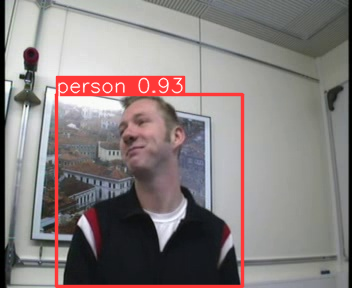

In [31]:


# Model
  # or yolov5m, yolov5l, yolov5x, custom

# Images
img = 'Images/MostDominant/IS1000a/person2/frameIS1000a_520_person2.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)
# Results
crops = results.show()  # or .show(), .save(), .print(), .pandas(), etc.